<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/AirbnbAnalysis/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - Paris

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Em 2024, o Airbnb conta com mais de **1.5 bilhão de reservas realizadas**

Atualmente, a empresa já conta com mais de **5 milhões de anfitriões** e mais de **7.7 milhões de comodidades** listadas na plataforma, contando com mais de 150 milhões de usuários ativos segundo o site [Search Logistics](https://www.searchlogistics.com/learn/statistics/airbnb-statistics/#:~:text=There%20are%20currently%20over%205,booked%20over%201.5%20billion%20stays)

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*, iremos analisar os dados referentes à cidade Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados utilizados neste projeto foram obtidos diretamente do portal [Inside Airbnb](https://insideairbnb.com/get-the-data/), uma iniciativa que disponibiliza informações detalhadas sobre as listagens do Airbnb em várias cidades ao redor do mundo.
A base de dados específica que estamos analisando refere-se às listagens na cidade do Rio de Janeiro, atualizada em 16 de março de 2024.
* [listings.csv](https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/visualisations/listings.csv) - Paris

In [1]:
# importar os pacotes necessarios
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100)

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/visualisations/listings.csv")

## Análise dos Dados


Nesta etapa iremos buscar compreender a estruturação dos dados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,39948,COSY INDEPENDENT ROOM IN CENTRAL PARIS,171483,Aliyah & Philippe,NaN,Bourse,48.87,2.34,Private room,NaN,5,126,2024-03-06,0.99,1,2,29,7510200734360
1,40143,Stylish & Design 1BR flat- Voltaire Bastille,172322,Emmanuelle,NaN,Popincourt,48.86,2.38,Entire home/apt,NaN,365,11,2017-04-16,0.07,1,0,0,NaN
2,40899,Lovely flat Canal Saint Martin Long stays,177130,Lola,NaN,Entrepôt,48.87,2.37,Entire home/apt,50.00,20,100,2022-08-19,0.92,1,176,0,7511000493125
3,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83,2.32,Entire home/apt,250.00,2,4,2019-10-24,0.05,1,355,0,7511409139079
4,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,NaN,Hôtel-de-Ville,48.85,2.36,Entire home/apt,107.00,1,393,2024-03-14,2.19,2,183,61,7510402838018


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 84397
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 30.3% das linhas.
* `price` e `licence` também apresentam um alto valor de dados nulos, com 27.8% e 23.46% respectivamente.
* A variável `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False)

neighbourhood_group              100.00
reviews_per_month                 30.30
last_review                       30.30
price                             27.82
license                           23.46
host_name                          0.01
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
name                               0.00
minimum_nights                     0.00
number_of_reviews                  0.00
host_id                            0.00
calculated_host_listings_count     0.00
availability_365                   0.00
number_of_reviews_ltm              0.00
id                                 0.00
dtype: float64

A base de dados nao apresenta nenhum dado duplicado aparentemente.

In [ ]:
df.duplicated().sum() / df.shape[0]

0.0

In [ ]:
df_base = df.copy()
df_base.drop(['license','neighbourhood_group'], axis = 1, inplace = True)

### **Q3. Qual o tipo de distribuição das variáveis?**
Para identificar a distribuição das variáveis, iremos plotar o histograma.

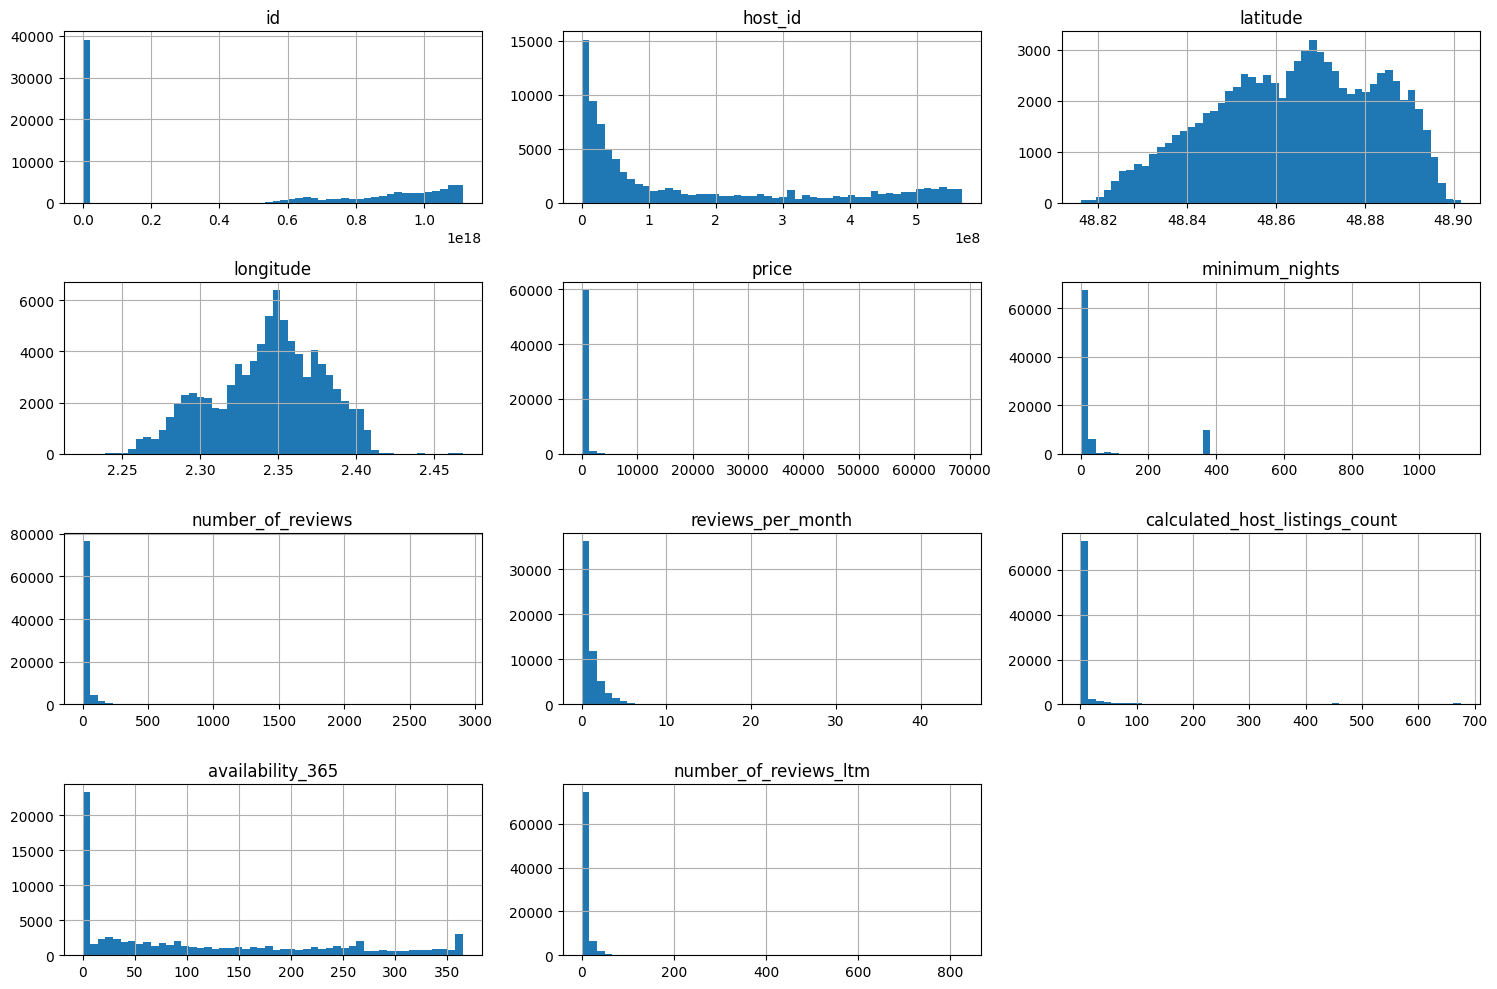

In [ ]:
# plotar o histograma das variáveis numéricas
df_base.hist(bins=50, figsize=(15,10));
plt.tight_layout()
plt.show();

### **Q4. Há outliers presentes?**



Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver a média da coluna `price``
df_base[['price','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe([0.75,0.8,0.9,0.95])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,"60,917.00","84,397.00","84,397.00","58,822.00","84,397.00","84,397.00","84,397.00"
mean,288.66,48.39,21.26,1.03,20.64,116.52,6.09
std,728.04,116.12,53.42,1.34,79.92,117.47,13.02
min,0.00,1.00,0.00,0.00,1.00,0.00,0.00
50%,156.00,3.00,4.00,0.58,1.00,78.00,1.00
75%,279.00,7.00,20.00,1.37,2.00,213.00,7.00
80%,320.00,30.00,26.00,1.67,5.00,243.00,10.00
90%,500.00,365.00,55.00,2.58,35.00,306.00,18.00
95%,806.00,365.00,97.20,3.57,98.00,347.00,29.00
max,"68,571.00","1,123.00","2,905.00",44.88,676.00,365.00,825.00


Observando o resumo estatístico acima, podemos verificar algumas informações como:


*   Na variável `price` possui 75% dos valores abaixo de 279, porém possui valor máximo de 68,571.00;
*   Na variável `minimum_nights` possuimos um valor máximo de 1,123, acima do limite real de 365 dias no ano (locação por no minimo 3 anos?)



#### Boxplot para variavel `price`

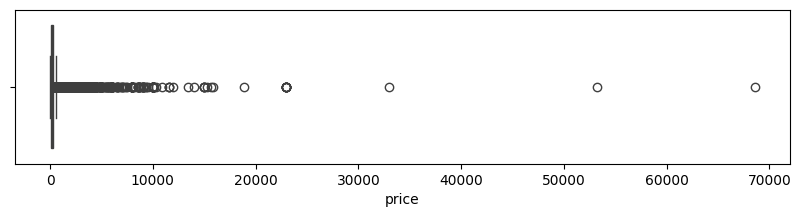



price: valores acima de 500
6019 valores acima de 500
9.88% dos valores encontrados são superiores a 500


In [ ]:
# price
plt.figure(figsize = (10,2))
sns.boxplot(df_base.price, orient = "h")
plt.show()

# ver a quantidade de valores acima de 500 (90%) para price
print("\n")
print(f'price: valores acima de 500')
print(f'{len(df_base[df_base.price > 500])} valores acima de 500')
print(f"{len(df_base[df_base.price > 500]) / df_base.price.count()*100:.2f}% \
dos valores encontrados são superiores a 500")

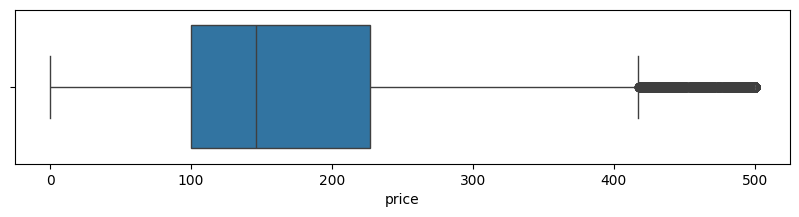

price: valores abaixo de 500
54898 valores abaixo de 500
90.12% dos valores encontrados são inferiores a 500


In [ ]:
plt.figure(figsize=(10,2))
sns.boxplot(df_base.price[df_base.price <= 500], orient = "h")
plt.show()

# ver a quantidade de valores abaixo de 500 para price
print(f'price: valores abaixo de 500')
print(f'{len(df_base[df_base.price <= 500])} valores abaixo de 500')
print(f"{len(df_base[df_base.price <= 500]) / df_base.price.count()*100:.2f}% \
dos valores encontrados são inferiores a 500")

Observa-se que existe uma concentração dos dados na regiao próximo dos EU$ 200.00

#### boxplot para `minimum_nights`

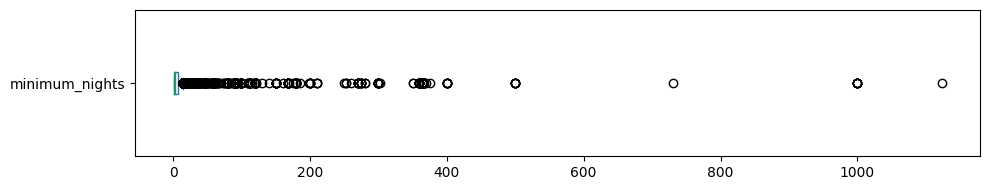



minimum_nights: valores acima de 30:
11831 valores acima de 30
14.018271% dos valores encontrados são superiores a 30 noites


In [ ]:
# minimum_nights
df_base.minimum_nights.plot(kind='box', vert = False, figsize = (10,2))
plt.tight_layout()
plt.show()


# ver a quantidade de valores acima de 30 dias para minimum_nights
print('\n')
print('minimum_nights: valores acima de 30:')
print(f"{len(df_base[df_base.minimum_nights > 30])} valores acima de 30")
print(f'{ len(df_base[df_base.minimum_nights > 30]) / df_base.shape[0]*100:2f}% \
dos valores encontrados são superiores a 30 noites')

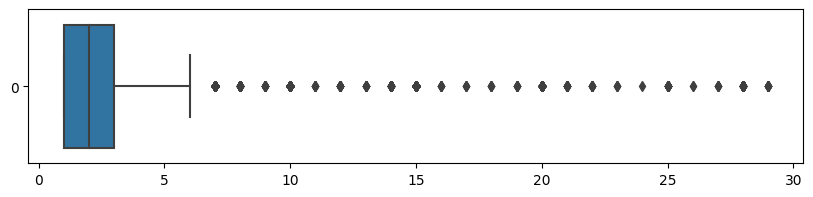

In [ ]:
plt.figure(figsize = (10,2))
sns.boxplot(df_base.minimum_nights[df_base.minimum_nights < 30], orient = "h")
plt.show();

#### Histrograma sem *outliers*

In [ ]:
df_clean = df_base.copy()
df_clean.drop(df_clean[df_clean.price > 250].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,39948,COSY INDEPENDENT ROOM IN CENTRAL PARIS,171483,Aliyah & Philippe,Bourse,48.87,2.34,Private room,NaN,5,126,2024-03-06,0.99,1,2,29
2,40899,Lovely flat Canal Saint Martin Long stays,177130,Lola,Entrepôt,48.87,2.37,Entire home/apt,50.00,20,100,2022-08-19,0.92,1,176,0
3,3109,zen and calm,3631,Anne,Observatoire,48.83,2.32,Entire home/apt,250.00,2,4,2019-10-24,0.05,1,355,0
4,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,Hôtel-de-Ville,48.85,2.36,Entire home/apt,107.00,1,393,2024-03-14,2.19,2,183,61
5,165409,studio charme Haut Marais PARIS,788732,Marylin & Ophelie,Temple,48.87,2.36,Entire home/apt,140.00,3,106,2023-10-21,0.69,1,25,14


<ipython-input-48-d266c682db5b>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews',


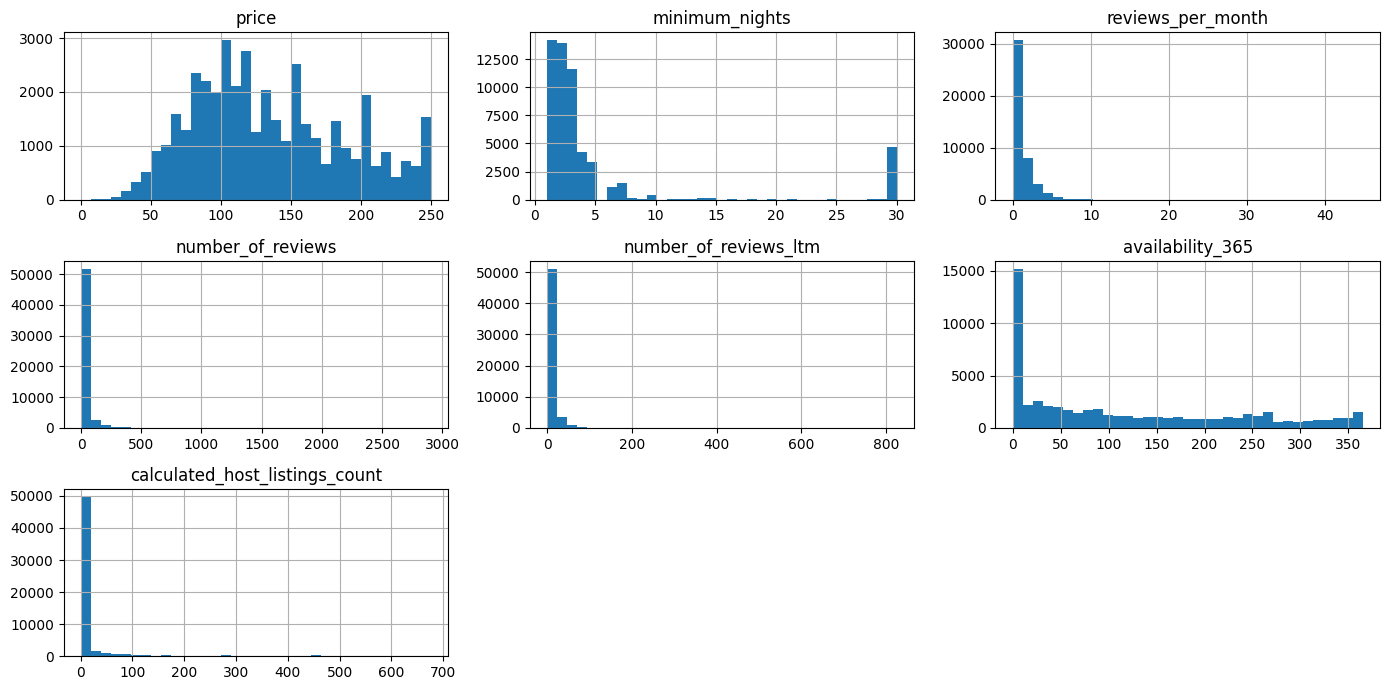

In [ ]:
# Crie uma figura e eixos para o gráfico
fig, axes = plt.subplots(figsize=(14, 7))

# Gere os histogramas usando o método hist() do Pandas e passe os eixos correspondentes
df_clean[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews',
          'number_of_reviews_ltm', 'availability_365', 'calculated_host_listings_count']]\
          .hist(bins=35, ax=axes)

# Ajuste o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exiba o gráfico
plt.show()


In [ ]:
df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe([0.75,0.9,0.95,0.99])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,"41,793.00","56,043.00","56,043.00","43,949.00","56,043.00","56,043.00","56,043.00"
mean,134.29,5.13,25.97,1.16,15.18,115.74,7.74
std,53.77,7.88,59.36,1.40,55.48,115.76,14.63
min,0.00,1.00,0.00,0.00,1.00,0.00,0.00
50%,125.00,2.00,7.00,0.72,1.00,77.00,2.00
75%,173.00,4.00,26.00,1.54,2.00,212.00,10.00
90%,215.00,10.00,66.00,2.81,29.00,302.00,22.00
95%,237.00,30.00,113.00,3.81,80.00,341.00,33.00
99%,250.00,30.00,281.58,6.12,406.00,364.00,63.00
max,250.00,30.00,"2,905.00",44.88,676.00,365.00,825.00


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews',
          'number_of_reviews_ltm', 'availability_365', 'calculated_host_listings_count']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count
price,1.00,-0.21,-0.07,-0.03,-0.05,0.05,0.03
minimum_nights,-0.21,1.00,-0.20,-0.09,-0.16,0.13,0.08
reviews_per_month,-0.07,-0.20,1.00,0.55,0.80,0.19,0.03
number_of_reviews,-0.03,-0.09,0.55,1.00,0.71,0.07,-0.03
number_of_reviews_ltm,-0.05,-0.16,0.80,0.71,1.00,0.13,-0.00
availability_365,0.05,0.13,0.19,0.07,0.13,1.00,0.12
calculated_host_listings_count,0.03,0.08,0.03,-0.03,-0.00,0.12,1.00


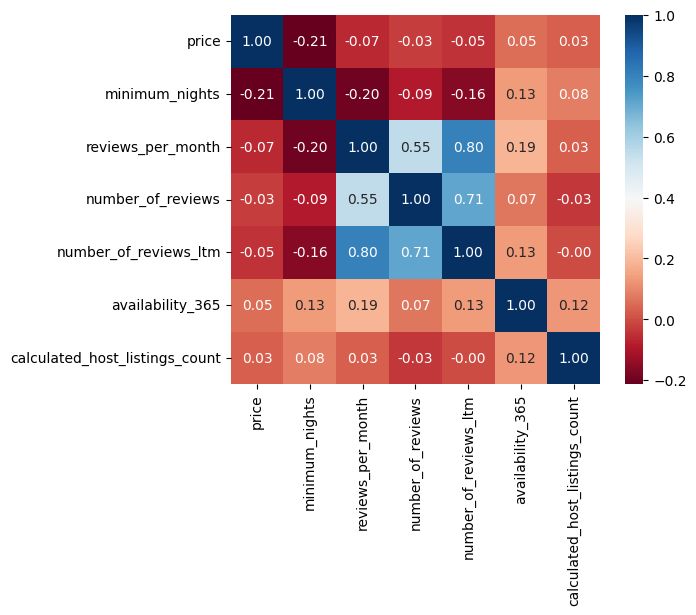

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    47534
Private room        7581
Hotel room           471
Shared room          457
Name: count, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

room_type
Entire home/apt   84.82
Private room      13.53
Hotel room         0.84
Shared room        0.82
Name: count, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# Agrupar pela localidade (neighbourhood), calcular o preço máximo e ordenar os resultados
df.groupby('neighbourhood')['price'].max().sort_values(ascending=False)[:10]

neighbourhood
Panthéon              68,571.00
Gobelins              53,239.00
Passy                 33,000.00
Batignolles-Monceau   22,968.00
Louvre                22,968.00
Palais-Bourbon        22,968.00
Élysée                22,968.00
Luxembourg            15,899.00
Ménilmontant          15,000.00
Popincourt            15,000.00
Name: price, dtype: float64

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Louvre           160.32
Hôtel-de-Ville   154.18
Temple           153.61
Élysée           151.88
Luxembourg       151.34
Palais-Bourbon   149.68
Bourse           146.55
Panthéon         146.50
Opéra            146.02
Passy            141.24
Name: price, dtype: float64

Lembrando que no nosso `df_clean`retiramos todas as linhas que continham `price` maior que 250 e `minimum_nights` superior a 30 dias.
Notamos também que mesmo no dataset filtrado, encontramos diversos imoveis nas regiões de:

Panthéon, Gobelins, Passy, Batignolles-Monceau, Louvre, Palais-Bourbon, Élysée,
Luxembourg,Ménilmontant, Popincourt.

In [ ]:
lista = ['Panthéon', 'Gobelins', 'Passy', 'Batignolles-Monceau', 'Louvre', 'Palais-Bourbon', 'Élysée', 'Luxembourg', 'Ménilmontant', 'Popincourt']
df_filtered = df_clean[df_clean['neighbourhood'].isin(lista)]
df_filtered.groupby('neighbourhood')['price'].count().sort_values(ascending=False)[:10]

neighbourhood
Popincourt             3943
Batignolles-Monceau    2942
Ménilmontant           2520
Passy                  2245
Gobelins               1493
Panthéon               1197
Élysée                 1008
Luxembourg              963
Palais-Bourbon          925
Louvre                  801
Name: price, dtype: int64

In [ ]:
# Identificar os 10 bairros com as maiores contagens
top_10_neighbourhoods = df_clean.groupby('neighbourhood').price.count().sort_values(ascending=False).head(10).index

# Filtrar df_clean para incluir apenas esses bairros
filtered_df = df_clean[df_clean['neighbourhood'].isin(top_10_neighbourhoods)]

# Agrupar por neighbourhood e calcular a média de price
filtered_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)


neighbourhood
Opéra                 146.02
Passy                 141.24
Vaugirard             135.17
Entrepôt              134.25
Popincourt            132.38
Batignolles-Monceau   132.26
Buttes-Montmartre     127.04
Reuilly               124.80
Buttes-Chaumont       118.10
Ménilmontant          114.02
Name: price, dtype: float64

Acima, vemos que a comunidade Complexo do Alemão está com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Complexo do Alemão.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

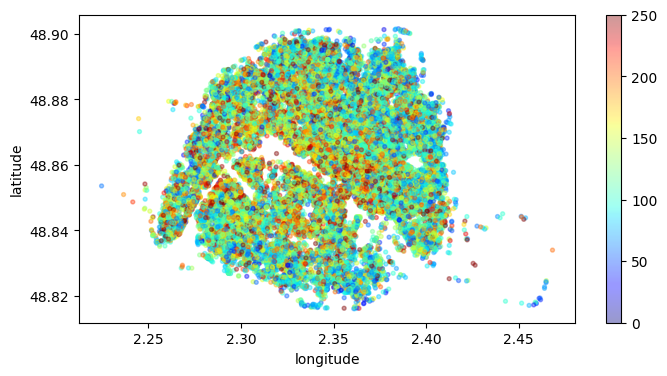

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(8,4));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()


5.1260996020912515

In [ ]:
df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:10]

neighbourhood
Luxembourg       7.71
Palais-Bourbon   7.67
Passy            6.97
Hôtel-de-Ville   6.72
Élysée           6.12
Panthéon         5.88
Temple           5.55
Louvre           5.51
Bourse           5.46
Vaugirard        5.35
Name: minimum_nights, dtype: float64

In [ ]:
filtered_df.groupby(['neighbourhood'])['minimum_nights'].mean().sort_values(ascending=False)[:10]

neighbourhood
Passy                 6.97
Vaugirard             5.35
Batignolles-Monceau   5.13
Popincourt            4.73
Reuilly               4.62
Buttes-Montmartre     4.49
Opéra                 4.40
Ménilmontant          4.40
Entrepôt              4.40
Buttes-Chaumont       4.13
Name: minimum_nights, dtype: float64

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.